## Information about this notebook

This example script was provided as part of the Data Management Project (INF) within the TR-172 ["ArctiC Amplification: Climate Relevant Atmospheric and SurfaCe Processes, and Feedback Mechanisms" (AC)³](http://www.ac3-tr.de/) funded by the German Research Foundation (Deutsche Forschungsgemeinschaft, DFG)

Author: Matthias Buschmann, [Institute of Environmental Physics](http://www.iup.uni-bremen.de), University of Bremen, Germany, m_buschmann@iup.physik.uni-bremen.de

Github repository: https://github.com/ac3-tr/ac3-notebooks

**Setup instructions for a reference Python Environment can be found on the [Github page](https://github.com/ac3-tr/ac3-notebooks)**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy, os
from netCDF4 import Dataset
%matplotlib inline

# Broadband solar irradiance during POLARSTERN cruise PS106/1 Ice Floe Camp


## Dataset resources

**Title:** Spatial and temporal variability of broadband solar irradiance during POLARSTERN cruise PS106/1 Ice Floe Camp (June 4th-16th 2017)  

**Author** Barrientos Velasco, Carola; Deneke, Hartwig; Macke, Andreas

**Year** 2018

**Institute** Tropos, Leipzig

**Data hosted by** [PANGAEA](https://pangaea.de)

**DOI** [10.1594/PANGAEA.896710](https://doi.org/10.1594/PANGAEA.896710)

**License** [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0/ "CC-BY-4.0")


## Abstract
The dataset is part of the expedition PS106/1 of the Research Vessel POLARSTERN to the Arctic Ocean in 2017.
During the ice floe camp (draft period, June 4th-16th 2017) 15 pyranometer stations were deployed over the ice floe covering an area of about 1 Km². Each station measured broadband solar irradiance and temperature at 1Hz resolution.

Relative humidity was also measured, however its use it is not recommended due to technical problems of the sensors.

Each file contains level and cleanliness flag describing the status of the pyranometer dome per day. The criterion is as follows.

Cleanliness
clean =1, drops =2, frozen =3, no observation = 4

Leveling
leveled =1, partially leveled =2, unleveled =3, no observation =4


## Reading example dataset

The list of binary NetCDF files can be downloaded via the link above and saved in the current working directory of this notebook. After checking the headersize of the ASCII file, the table can be read as a NumPy record array. The print statement checks the loaded fields in the recarray.

In [2]:
datafolder = '../ac3/INF/pangaea_download/'
datasetlist = np.recfromtxt(os.path.join(datafolder, 'Barrientos-Velasco-etal_2018.tab'), skip_header=38, delimiter='\t', names=True, encoding='utf8')
print (datasetlist.dtype.names)

('Event', 'Latitude', 'Longitude', 'DateTime', 'Content', 'File_name', 'File_format', 'File_size_kByte', 'URL_file')


As an example we can download the first file in the collection, using a *wget* if your system supports it. If not, you can go to the link printed and downloaded manually.

In [3]:
url = datasetlist['URL_file'][0]
fname = url[url.rfind('/')+1:]
print ('Downloading ... ', url)
try:
    if not os.path.exists(os.path.join(datafolder,fname)):
        os.system('wget -O '+os.path.join(datafolder,fname)+' '+url)
        print ('Download finished')
    else:
        print ('File already there...')
except:
    print ('Could not download automatically, please try manual download!')

File already there...


## Read in the downloaded NetCDF file


In [4]:
fname = url[url.rfind('/')+1:]
rootgrp = Dataset(os.path.join(datafolder,fname), 'r', format="NETCDF4")
print (rootgrp.variables.keys())


odict_keys(['time', 'station', 'calibration', 'szen', 'sazi', 'esd', 'qcflag_level', 'qcflag_clean', 'lon', 'lat', 'ghi', 'ta', 'rh', 'F0'])


In [ ]:
par = 'ghi'
pardescription = rootgrp.variables[par].long_name+' ['+rootgrp.variables[par].units+']'
ghi = rootgrp.variables[par][:]
ghi = ghi[~np.isnan(ghi)]
          
lat = rootgrp.variables['lat'][:]
lat = lat[~np.isnan(lat)]
lon = rootgrp.variables['lon'][:]
lon = lon[~np.isnan(lon)]

## Overview plot

As an overview, the data fields can be plotted against flight time. Time is converted from seconds to hours.

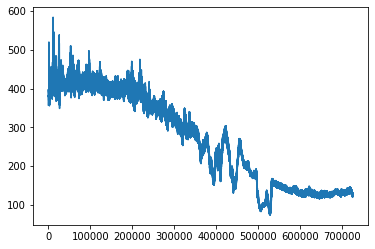

In [6]:
plt.plot(ghi)

## Plotting a map

Using the Cartopy module, the data can be plotted as a function of latitude and longitude. An additional Natural Earth feature of Cartopy is used to show the Svalbard landmass with a black facecolor. For each dataset a distinct plot can be made that shows the values of the corresponding data on the attached colorbar. A different colormap was chosen for the second plot to distinguish between the separat data products.

In [7]:
land10m = cartopy.feature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='None', facecolor='k')
land50m = cartopy.feature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='None', facecolor='k')
land110m = cartopy.feature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='None', facecolor='k')

In [8]:
latmin, latmax = np.min(lat), np.max(lat)
lonmin, lonmax = np.min(lon), np.max(lon)

print(latmin, latmax, lonmin, lonmax)

81.92865 81.95641 10.467867 10.765324


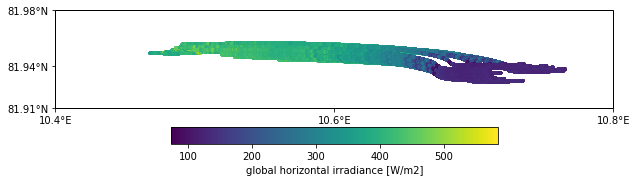

In [9]:
c = lon>1.55
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111, projection=ccrs.PlateCarree()) #Orthographic(0, 90))
#ax1.add_feature(land50m)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
#ax1.gridlines()
#ax1.set_extent([lonmin, lonmax, latmin, latmax], crs=ccrs.PlateCarree())
ax1.set_extent([10.4, 10.8, 81.91, 81.97], crs=ccrs.PlateCarree())
sc = ax1.scatter(lon[c], lat[c], s=5, c=ghi[c], transform=ccrs.PlateCarree())
ax1.set_xticks([10.4,10.6,10.8], crs=ccrs.PlateCarree())
ax1.set_yticks([81.91,81.94,81.98], crs=ccrs.PlateCarree())
cb = fig.colorbar(sc, ax=ax1, orientation='horizontal', fraction=0.05, pad=0.06)
cb.set_label(pardescription)
